In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('played_out_removed_NA.csv', index_col=False)


In [106]:
print(data.shape)
data.head()

(4299, 22)


position                                            user  first_genre  \
0         0  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
1         1  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
2         2  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
3         3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
4         4  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   

                               track_name                track_id  popularity  \
0                  Subzero - Original Mix  7p6oXzBSPAXXz8Xb8gBPki          45   
1                         I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK          85   
2                      I Don't Wanna Wait  331l3xABO0HMr1Kkyh2LZq          81   
3  Love Tonight (David Guetta Remix Edit)  2prnn41CblB8B4yWACDljP          76   
4             Wide Open - Len Faki DjEdit  477I4wif0etzeupmlQzTxl          40   

   explicit  acousticness  danceability  energy  ...  liveness  loudness  \
0     False      0.588000         0.793   0.608  ...    0.0991   -11.638   
1      True      0.003830         0.561   0.965  ...    0.3710    -3.673   
2     False      0.037500         0.681   0.714  ...    0.2320    -4.617   
3     False      0.015000         0.621   0.989  ...    0.1840    -4.225   
4     False      0.000077         0.886   0.616  ...    0.0987    -7.105   

   mode  speechiness    tempo  valence                     artist  \
0   0.0       0.0673  124.988   0.1180                  Ben Klock   
1   0.0       0.0343  128.040   0.3040   David Guetta, Bebe Rexha   
2   0.0       0.0309  129.976   0.5540  David Guetta, OneRepublic   
3   0.0       0.0434  126.002   0.0348       Shouse, David Guetta   
4   1.0       0.0835  128.015   0.0952   DJ Hyperactive, Len Faki   

   duration_ms gender  age  
0       383972      M   40  
1       175238      M   40  
2       149667      M   40  
3       158095      M   40  
4       435571      M   40  

[5 rows x 22 columns]

# Analysis

In [107]:
## Feature separation
# >>> Included popularity as one of the continuous features
continuous_features = ['popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 
                       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'] # 10
categorical_features = ['key', 'mode'] # 2

audio_features = continuous_features + categorical_features # 12

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply standardization to continuous features
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [109]:
data.keys() # 22


Index(['position', 'user', 'first_genre', 'track_name', 'track_id',
       'popularity', 'explicit', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'artist', 'duration_ms', 'gender',
       'age'],
      dtype='object')

In [110]:
# 1) Make sure this cell runs AFTER any place where genre_mapping was a list
genre_mapping = {
    1: '(1) Pop & Mainstream',
    2: '(2) Urban & Contemporary',
    3: '(3) Electronic & Beat-Based',
    4: '(4) Rock & Heavy',
    5: '(5) Roots, Jazz & Classical Traditions'
}

# 2) If first_genre is float, cast to int
data = data.copy()
data['genre_label'] = data['first_genre'].map(genre_mapping)

print(type(genre_mapping))          # should be <class 'dict'>
print(data[['first_genre', 'genre_label']])


<class 'dict'>
      first_genre                  genre_label
0               3  (3) Electronic & Beat-Based
1               3  (3) Electronic & Beat-Based
2               3  (3) Electronic & Beat-Based
3               3  (3) Electronic & Beat-Based
4               3  (3) Electronic & Beat-Based
...           ...                          ...
4294            1         (1) Pop & Mainstream
4295            1         (1) Pop & Mainstream
4296            1         (1) Pop & Mainstream
4297            1         (1) Pop & Mainstream
4298            1         (1) Pop & Mainstream

[4299 rows x 2 columns]


# 1) each audio feature over 50 consequent posistions w.r.t. 5 genres

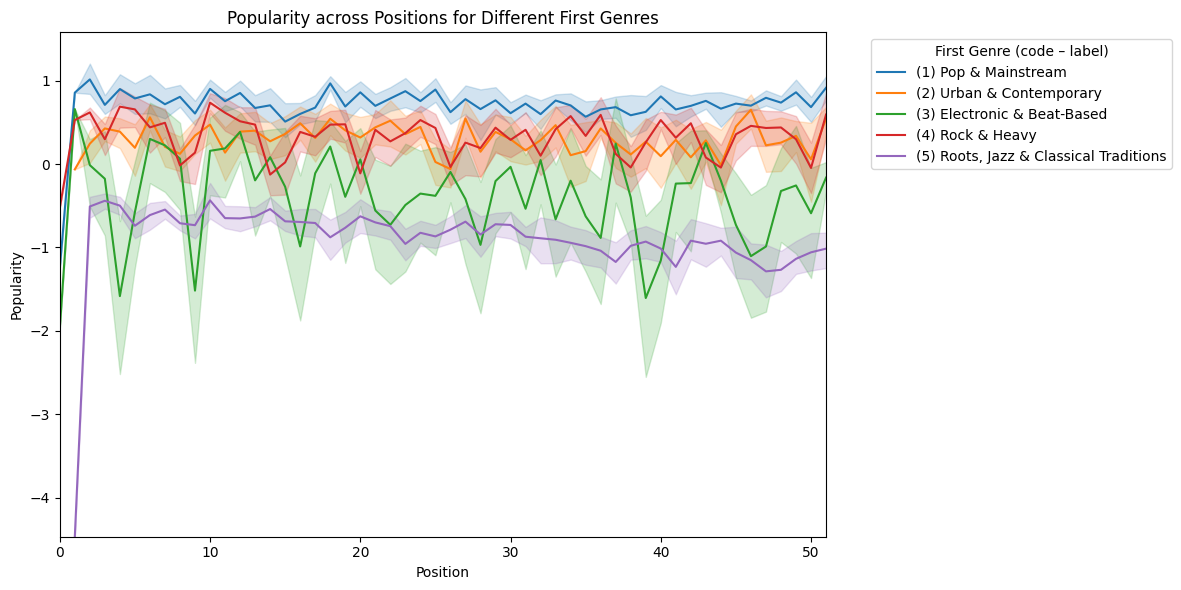

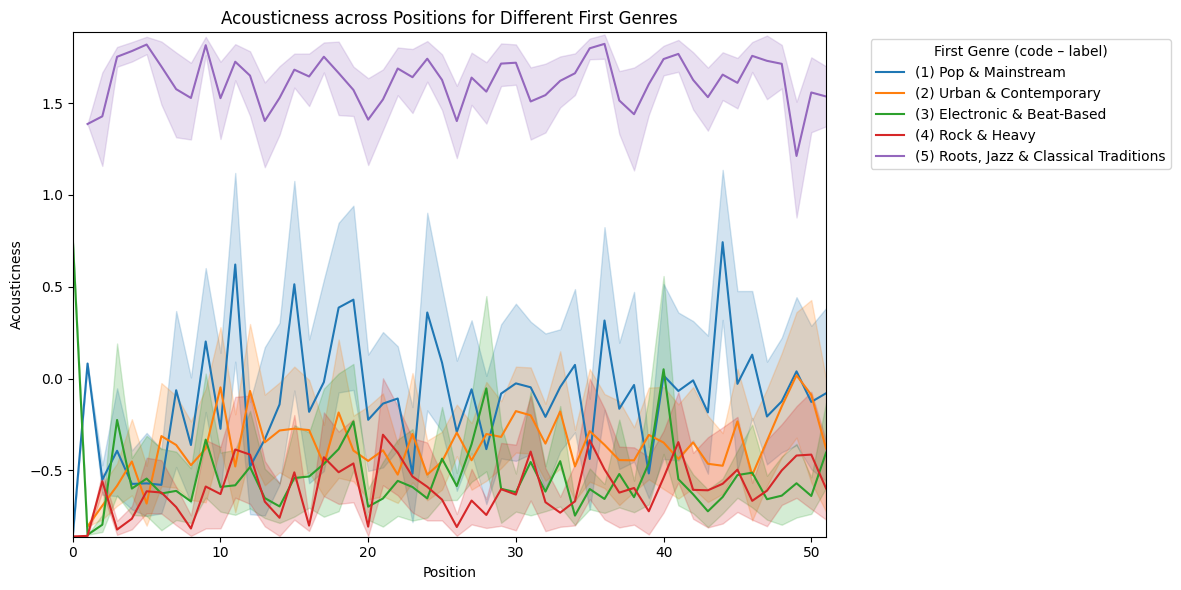

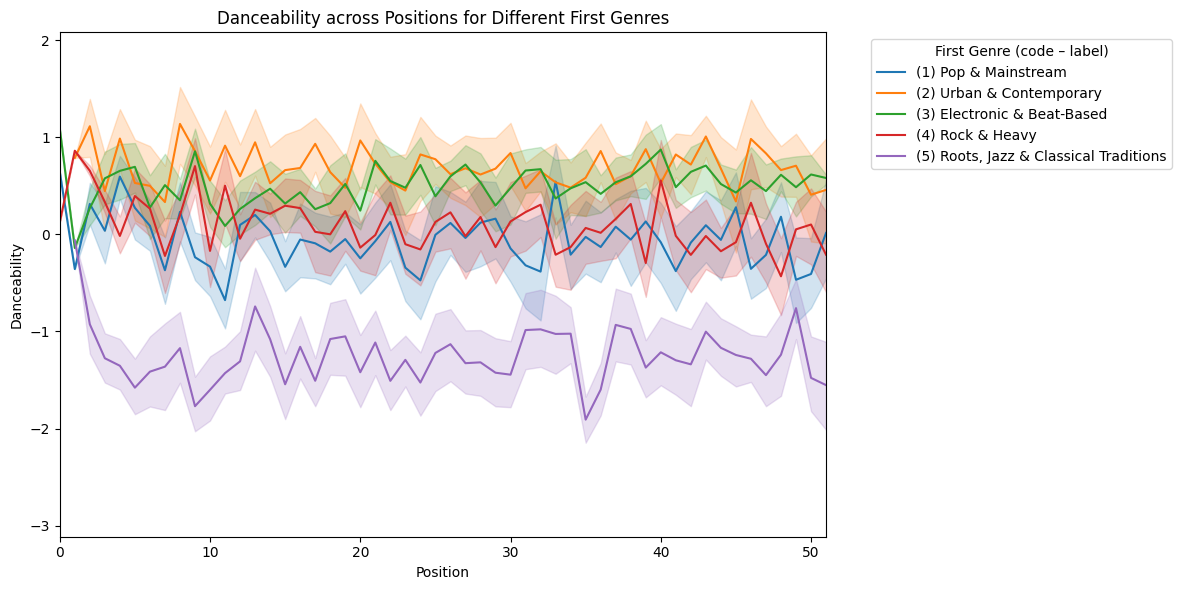

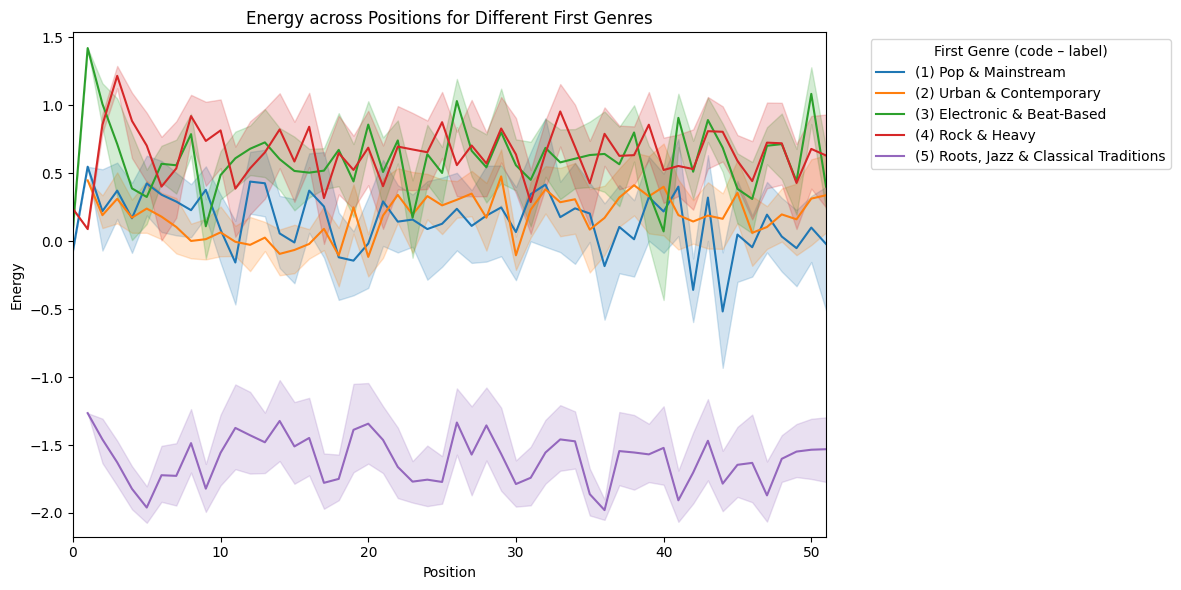

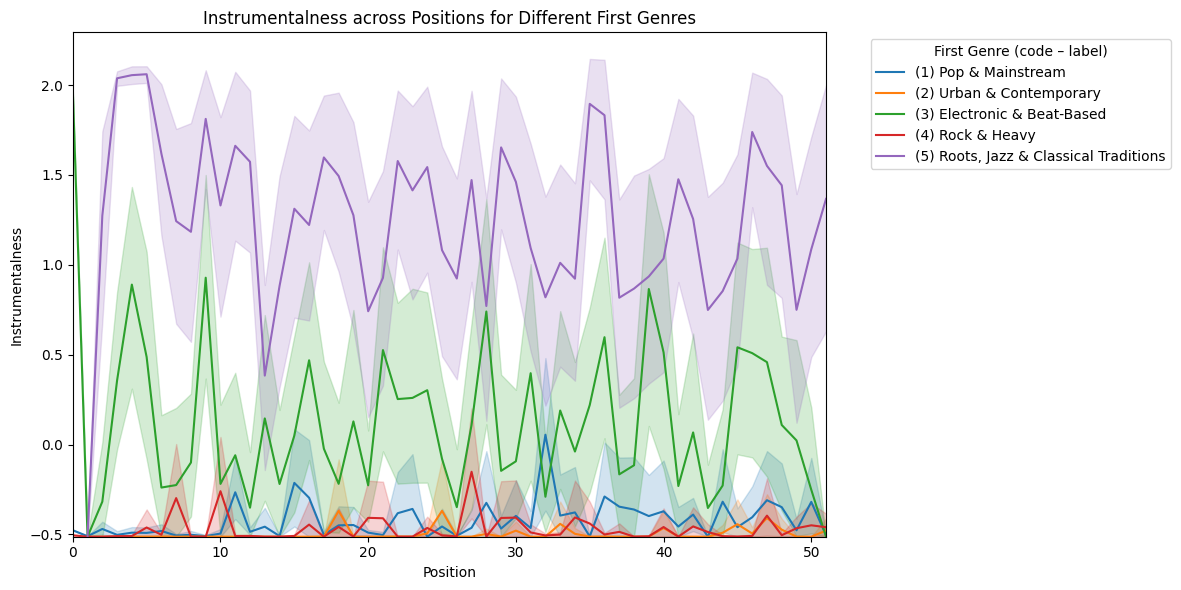

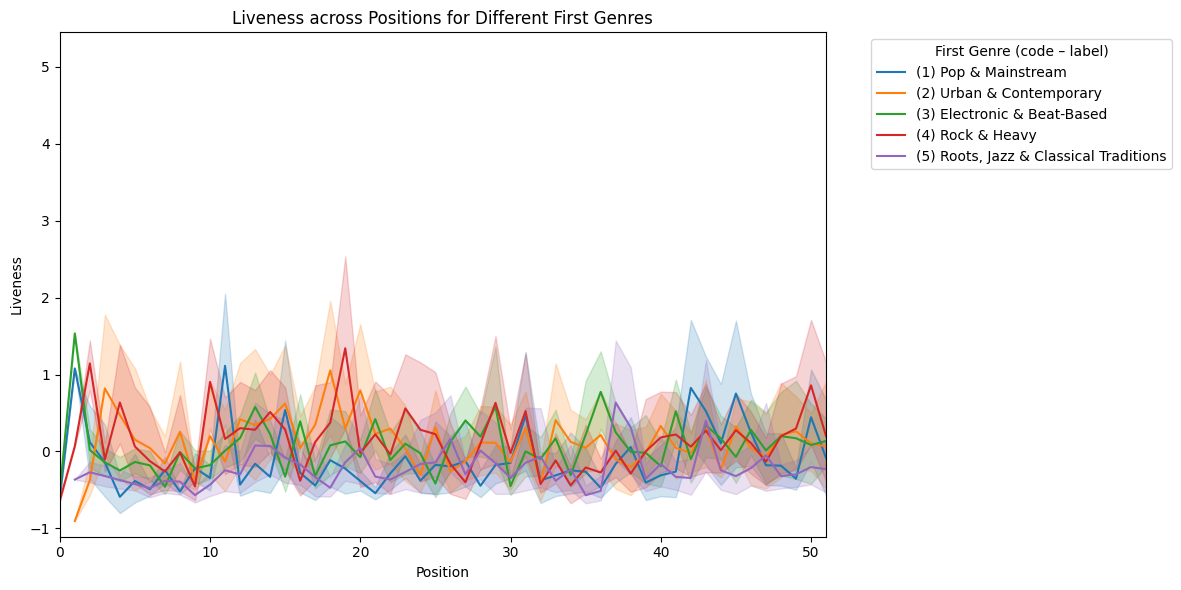

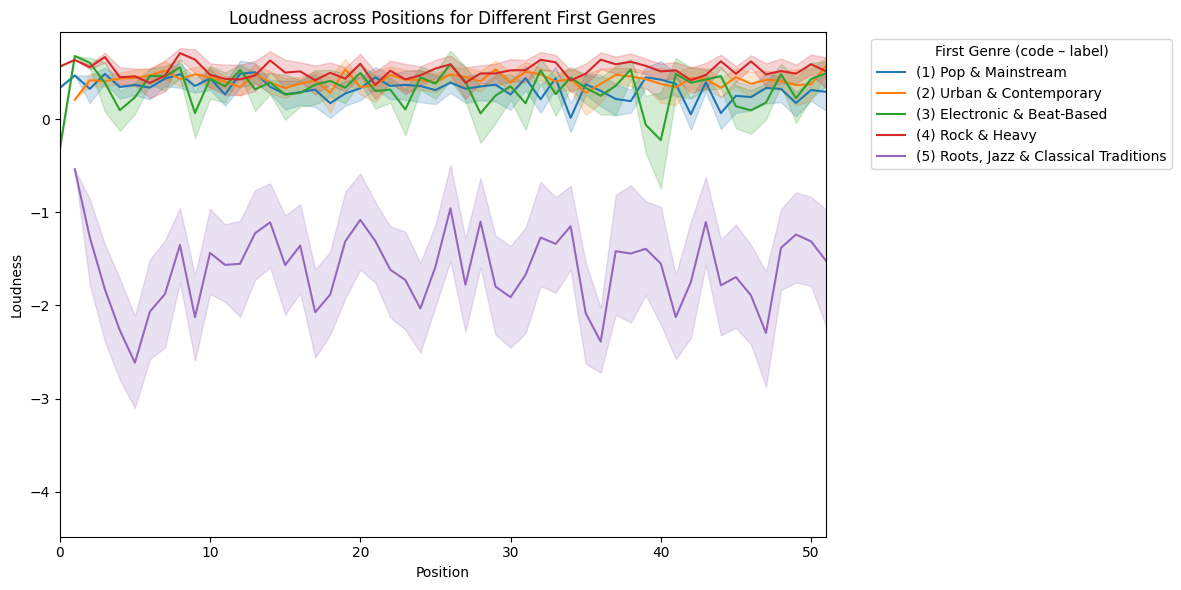

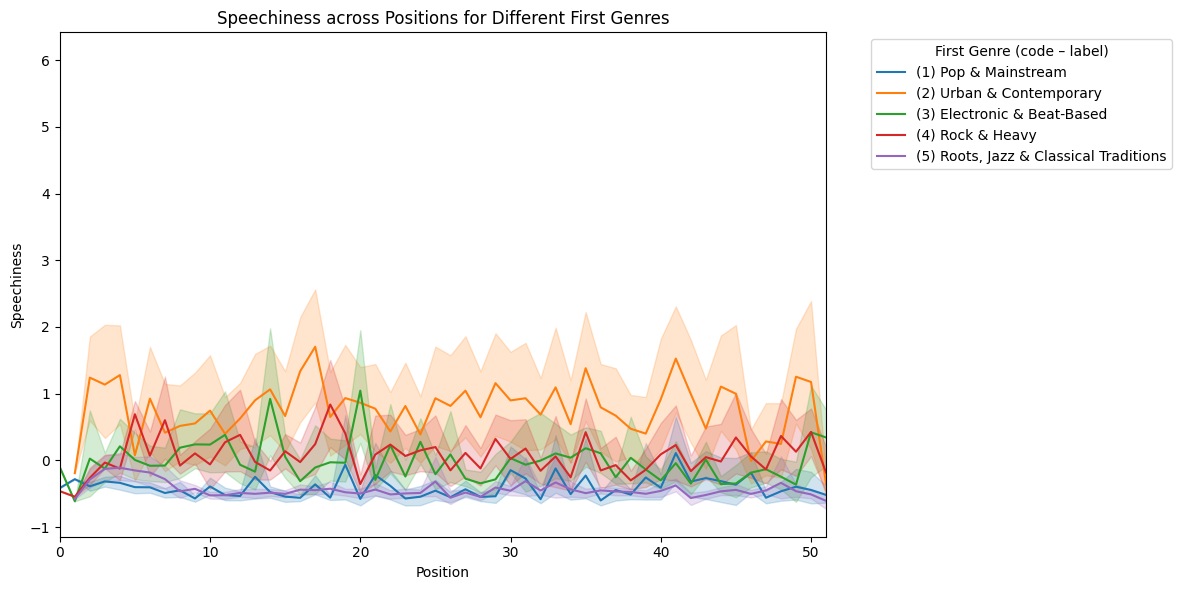

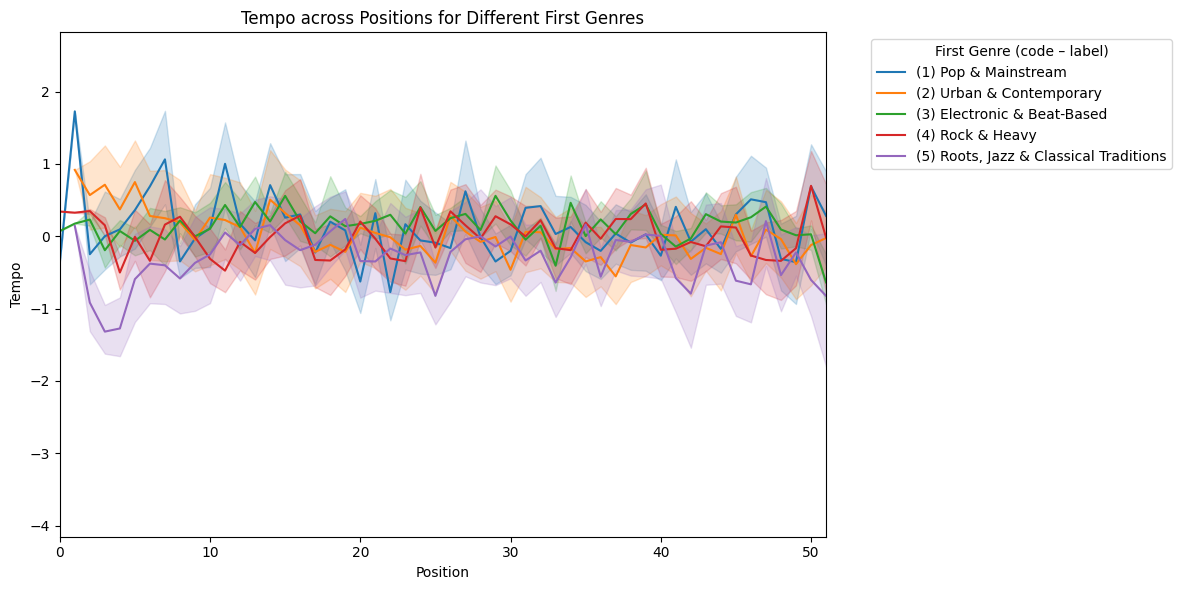

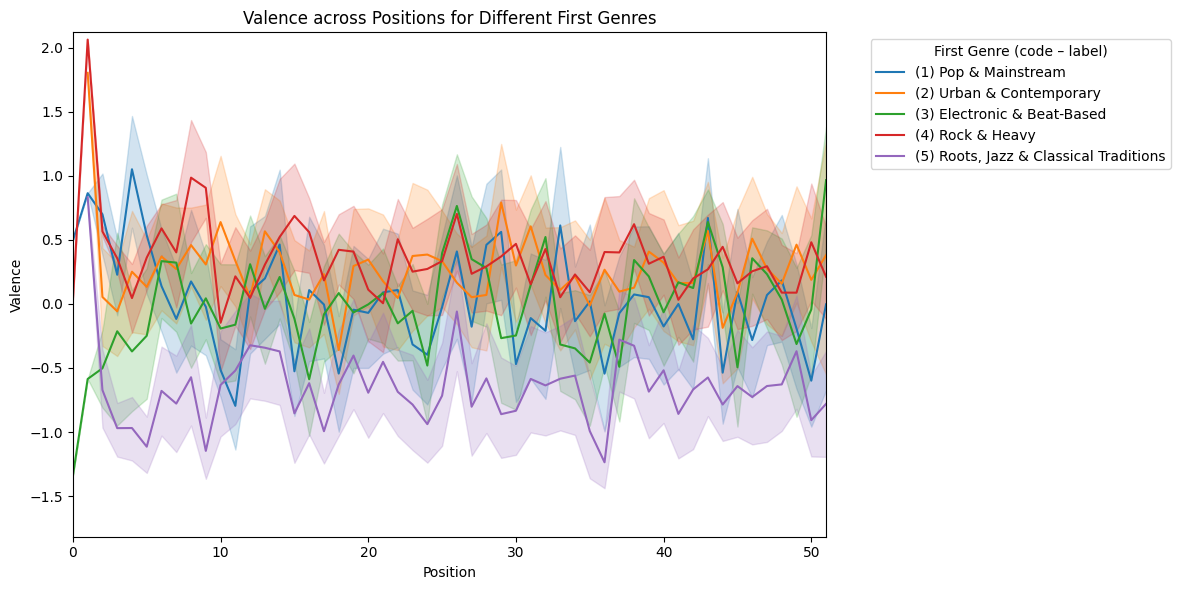

In [111]:
# Build ordered list of labels based on numeric code
ordered_labels = [genre_mapping[i] for i in sorted(genre_mapping.keys())]

for feature in continuous_features:
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(
        x='position',
        y=feature,
        hue='genre_label',
        data=data,
        palette='tab10',
        hue_order=ordered_labels      # <- forces legend order (1..5)
    )
    plt.xlim(0, 51)
    plt.ylim(data[feature].min(), data[feature].max())
    plt.title(f'{feature.capitalize()} across Positions for Different First Genres')
    plt.xlabel('Position')
    plt.ylabel(feature.capitalize())
    plt.legend(
        title='First Genre (code – label)',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    plt.tight_layout()
    plt.show()

## 2) Distance based, Audio features as a vector
Considering distance from the 2 seed songs to other 48 songs as an output and positions as an input


In [112]:
from scipy.spatial.distance import hamming

In [113]:
data[audio_features]



data.sort_values(['user','first_genre','position'])

position                                            user  first_genre  \
0            0  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
1            1  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
2            2  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
3            3  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
4            4  0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond            3   
...        ...                                             ...          ...   
4294        45                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c            1   
4295        46                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c            1   
4296        47                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c            1   
4297        48                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c            1   
4298        49                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c            1   

                                  track_name                track_id  \
0                     Subzero - Original Mix  7p6oXzBSPAXXz8Xb8gBPki   
1                            I'm Good (Blue)  4uUG5RXrOk84mYEfFvj3cK   
2                         I Don't Wanna Wait  331l3xABO0HMr1Kkyh2LZq   
3     Love Tonight (David Guetta Remix Edit)  2prnn41CblB8B4yWACDljP   
4                Wide Open - Len Faki DjEdit  477I4wif0etzeupmlQzTxl   
...                                      ...                     ...   
4294                           The Scientist  75JFxkI2RXiU7L9VXzMkle   
4295                Something Just Like This  6RUKPb4LETWmmr3iAEQktW   
4296                              WILDFLOWER  3QaPy1KgI7nu9FJEQUgn6h   
4297                Kiss Me More (feat. SZA)  3DarAbFujv6eYNliUTyqtz   
4298                        I Wanna Be Yours  5XeFesFbtLpXzIVDNQP22n   

      popularity  explicit  acousticness  danceability    energy  ...  \
0      -1.971184     False      0.760508      1.090316  0.089171  ...   
1       0.659264      True     -0.850281     -0.139816  1.421157  ...   
2       0.396219     False     -0.757440      0.496460  0.484663  ...   
3       0.067413     False     -0.819481      0.178322  1.510703  ...   
4      -2.299990     False     -0.860629      1.583430  0.119020  ...   
...          ...       ...           ...           ...       ...  ...   
4294    0.922309     False      1.154816     -0.161025 -0.530184  ...   
4295    0.856548     False     -0.723524      0.157113  0.189910  ...   
4296    1.185354     False      0.826686     -0.638231 -1.257739  ...   
4297    0.725025      True     -0.146676      0.936550  0.451083  ...   
4298    1.119592     False     -0.485836     -0.654138 -0.623460  ...   

      loudness  mode  speechiness     tempo   valence  \
0    -0.321326   0.0    -0.102106  0.072394 -1.339579   
1     0.679642   0.0    -0.613612  0.175592 -0.585827   
2     0.561009   0.0    -0.666313  0.241055  0.427280   
3     0.610272   0.0    -0.472561  0.106681 -1.676741   
4     0.248340   1.0     0.148998  0.174747 -1.431974   
...        ...   ...          ...       ...       ...   
4294  0.233385   1.0    -0.768615  0.792245 -0.954598   
4295  0.290566   0.0    -0.653913 -0.670449 -0.010383   
4296 -0.367070   0.0    -0.477211  0.853920 -1.307159   
4297  0.706033   1.0    -0.705064 -0.401600  1.347181   
4298 -0.033162   0.0    -0.748464 -1.870516  0.123347   

                          artist  duration_ms  gender age  \
0                      Ben Klock       383972       M  40   
1       David Guetta, Bebe Rexha       175238       M  40   
2      David Guetta, OneRepublic       149667       M  40   
3           Shouse, David Guetta       158095       M  40   
4       DJ Hyperactive, Len Faki       435571       M  40   
...                          ...          ...     ...  ..   
4294                    Coldplay       309600       M  20   
4295  The Chainsmokers, Coldplay       247160       M  20   
4296               Billie Eilish       261466       M  20   
4297               D

In [114]:
# function to compute per-user drift analysis
def user_drift_analysis(session):
    """
    Per-user: distances from genre-specific dual seeds
    
    Parameters:
    -----------
    session : pd.DataFrame
        Single user's playlist data with columns: 'user', 'position', 'first_genre', 
        continuous_features, categorical_features
    
    Returns:
    --------
    pd.DataFrame
        Drift metrics for positions 2-49:
        - user, position (2-49), user_seed_genre (1-5)
        - cont_drift (Euclidean continuous), cat_drift (Hamming categorical) 
        - total_drift = cont_drift + cat_drift
        
    Logic:
    ------
    1. Handle edge cases: <3 songs → empty; >49 songs → truncate to 49
    2. Extract user_seed_genre = int(session.iloc[0]['first_genre'])
    3. Dual seeds (pos 0+1):
       - Continuous: mean(seeds[continuous_features])
       - Categorical: mode(seeds[categorical_features])
    4. For pos 2-49: 
       cont_drift = ||seed_cont - song_cont||₂ (Euclidean)
       cat_drift  = hamming(seed_cat, song_cat) [0-1 normalized]
       total_drift = cont_drift + cat_drift
    """
    session = session.sort_values('position').reset_index(drop=True)
    
    # In case if user playlist consists of less than 3 songs 
    if len(session) < 3:
        return pd.DataFrame() # empty data frame
    
    # FIXED: User's seed genre (same for all 48 songs)
    user_seed_genre = int(session.iloc[0]['first_genre'])  # Genre 1-5 for this user
    
    # Dual seeds: pos 0+1 (guaranteed same genre)
    seeds = session[session['position'] <= 1]

    # 1) For continuous features, use the mean across the seed rows
    seed_cont = np.mean(seeds[continuous_features].values, axis=0).reshape(1, -1)
    
    # 2) For categorical features, use the mode (most common value) across the seed rows
    # and compute Hamming distance (proportion of differing categorical entries)
    seed_cat = seeds[categorical_features].mode().iloc[0].astype(int).values.reshape(1, -1)
    
    results = []
    
    # All 48 post-seed songs
    for _, song in session[session['position'] > 1].iterrows():
        song_cont = song[continuous_features].values.reshape(1, -1)
        song_cat  = song[categorical_features].astype(int).values.reshape(1, -1)
        
        # Calculating Euclidean distance for continuous features
        cont_drift = np.linalg.norm(seed_cont - song_cont)
        
        # Calculating Hamming distance for categorical features
        cat_drift = hamming(seed_cat.ravel(), song_cat.ravel()) # normalized distance
        
        # Total drift as sum of both
        total_drift = cont_drift + cat_drift
        
        results.append({
            'user': song['user'],
            'position': int(song['position']),  # 2-49
            'user_seed_genre': user_seed_genre,  # FIXED: User's genre (1-5)
            'cont_drift': float(cont_drift),
            'cat_drift': float(cat_drift),
            'total_drift': float(total_drift)
        })
    
    return pd.DataFrame(results)


In [115]:
# Generate: 89 users × 48 songs ~= 4272 but 4157
# Not all playlist has 50 songs
user_drifts = [user_drift_analysis(group) for _, group in data.groupby('user')]

all_user_drifts = pd.concat([df for df in user_drifts if len(df) > 0], ignore_index=True)

print(all_user_drifts.shape)

all_user_drifts

(4157, 6)


user  position  \
0     0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         2   
1     0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         3   
2     0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         4   
3     0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         5   
4     0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond         6   
...                                              ...       ...   
4152                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c        45   
4153                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c        46   
4154                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c        47   
4155                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c        48   
4156                 f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c        49   

      user_seed_genre  cont_drift  cat_drift  total_drift  
0                   3    2.328410        0.5     2.828410  
1                   3    1.639224        0.5     2.139224  
2                   3    2.877924        1.0     3.877924  
3                   3    2.851989        1.0     3.851989  
4                   3    4.097489        0.5     4.597489  
...               ...         ...        ...          ...  
4152                1    2.770216        0.5     3.270216  
4153                1    1.928205        0.5     2.428205  
4154                1    3.297617        0.5     3.797617  
4155                1    1.947938        1.0     2.947938  
4156                1    3.304753        0.5     3.804753  

[4157 rows x 6 columns]

In [116]:
all_user_drifts.to_csv('89_user_48_song_drifts.csv', index=False)
print("\nColumns:", all_user_drifts.columns.tolist())
print("\nQuick stats by user_seed_genre:")
print(all_user_drifts.groupby('user_seed_genre')['total_drift'].agg(['mean', 'std', 'count']).round(3))



Columns: ['user', 'position', 'user_seed_genre', 'cont_drift', 'cat_drift', 'total_drift']

Quick stats by user_seed_genre:
                  mean    std  count
user_seed_genre                     
1                3.452  0.747    776
2                4.132  1.215    826
3                3.578  0.811    827
4                3.241  1.036    882
5                5.971  0.882    846


## 🎵 **Genre Drift Summary** (4,157 measurements)

| **Genre** | **Mean Drift** | **Std** | **Count** | **Seed Control** |
|-----------|----------------|---------|-----------|------------------|
| **1** (Pop) | **3.452** | 0.747 | 776 | Medium |
| **2** (Urban) | **4.132** | **1.215** | 826 | Weak |
| **3** (Electronic) | 3.578 | 0.811 | 827 | Medium |
| **4** (Rock) | **3.241** | 1.036 | **882** | **STRONGEST**  |
| **5** (Roots/Jazz) | **5.971** | 0.882 | 846 | **WEAKEST** |

### **Key Insights:**
- **Genre 4 (Rock & Heavy)**: **Lowest drift** → **Strongest seed control**
- **Genre 5 (Roots/Jazz/Classical)**: **Highest drift** → **Weakest seed control**  
- **Genre 2**: Most **variable** (highest std = inconsistent influence)

**Research Finding**: Seeds shape Rock playlists most, Classical least!


In [117]:

# Make sure this cell runs AFTER any place where genre_mapping is dictionary
genre_mapping = {
    1: 'Pop & Mainstream',
    2: 'Urban & Contemporary',
    3: 'Electronic & Beat-Based',
    4: 'Rock & Heavy',
    5: 'Roots, Jazz & Classical Traditions'
}
# Load your saved data
all_user_drifts = pd.read_csv('89_user_48_song_drifts.csv')

# Calculate mean + std by position and genre (~18 users per genre)
drift_stats = all_user_drifts.groupby(['position', 'user_seed_genre'])['total_drift'].agg(['mean', 'std', 'count']).reset_index()

print("Stats preview:")
print(drift_stats.head())
print(f"Genres: {sorted(all_user_drifts['user_seed_genre'].unique())}")
print(f"Positions: {all_user_drifts['position'].min()} → {all_user_drifts['position'].max()}")

drift_stats.shape 


Stats preview:
   position  user_seed_genre      mean       std  count
0         2                1  3.325962  0.191268     17
1         2                2  3.614987  1.166457     16
2         2                3  3.334617  0.939929     18
3         2                4  2.976860  0.207511     18
4         2                5  5.925531  0.954615     17
Genres: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Positions: 2 → 51


(250, 5)

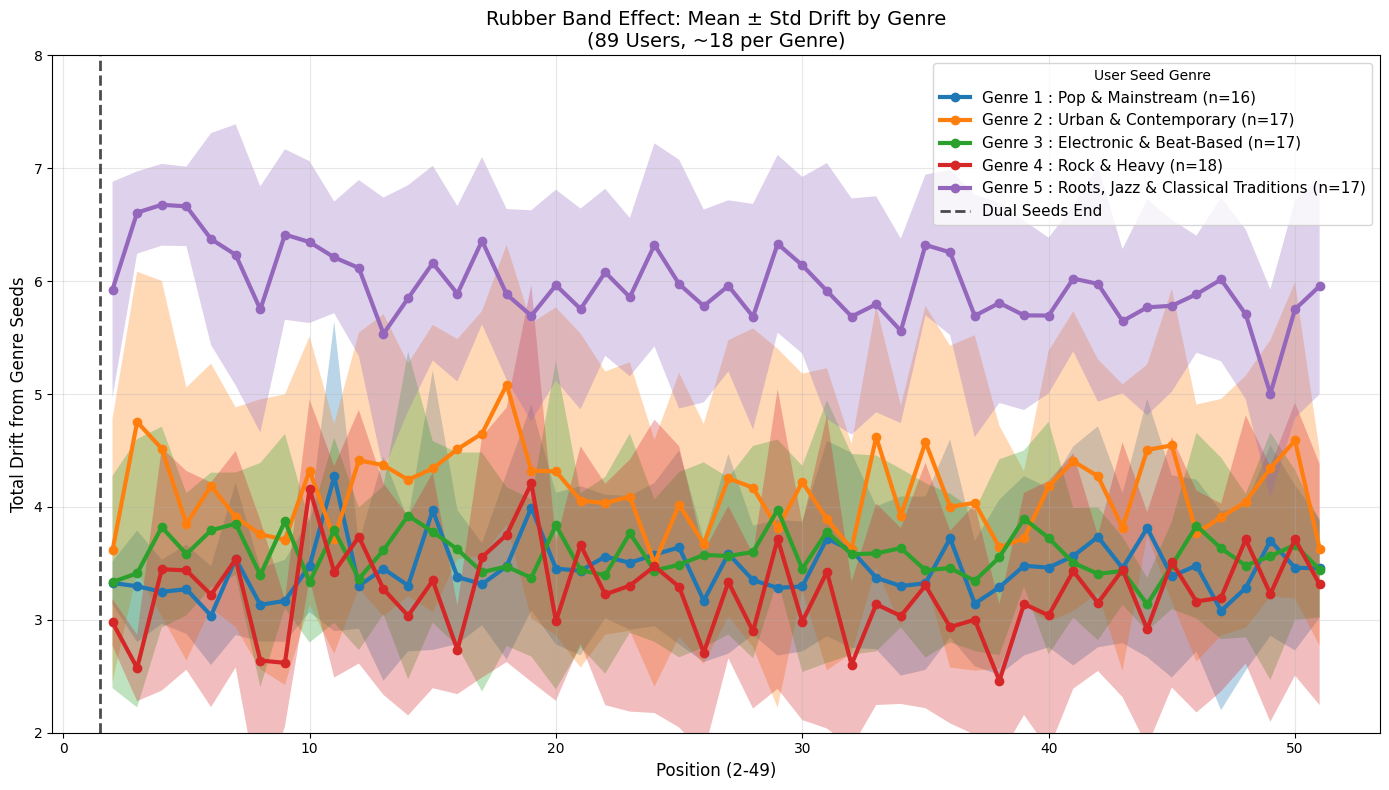

In [118]:
import seaborn as sns

# Plot 1: With Bands Mean ± 1 std, ~18 users per genre per position
plt.figure(figsize=(14, 8))
for genre in sorted(all_user_drifts['user_seed_genre'].unique()):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.plot(
    genre_data['position'],
    genre_data['mean'],
    marker='o',
    linewidth=3,
    label=(
        f"Genre {int(genre)} : "
        f"{genre_mapping[int(genre)]} "
        f"(n={genre_data['count'].mean():.0f})"
    )
)

    # Shaded std region
    plt.fill_between(genre_data['position'],genre_data['mean'] - genre_data['std'],genre_data['mean'] + genre_data['std'], alpha=0.3)

plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
plt.xlabel('Position (2-49)', fontsize=12)
plt.ylabel('Total Drift from Genre Seeds', fontsize=12)
plt.title('Rubber Band Effect: Mean ± Std Drift by Genre\n(89 Users, ~18 per Genre)', fontsize=14)
plt.legend(title='User Seed Genre', fontsize=11)
plt.ylim(2, 8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [119]:
# Filter positions 0 and 1 only (dual seeds)
dual_seed_data = data[data['position'] <= 1]

# Calculate dual seed profiles by first_genre
dual_seeds = dual_seed_data.groupby('first_genre')[audio_features].agg({
    # Continuous features: MEAN of pos 0+1
    **{feat: 'mean' for feat in continuous_features},
    
    # Categorical features: MODE (most common) of pos 0+1  
    **{feat: lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else -1 
        for feat in categorical_features}
})


dual_seeds['genre_label'] = dual_seeds.index.map(genre_mapping)
dual_seeds = dual_seeds.reset_index()

dual_seeds

first_genre  popularity  acousticness  danceability    energy  \
0            1   -0.195632     -0.386445      0.143857  0.238413   
1            2   -0.064109     -0.804867      0.788086  0.447352   
2            3   -0.655960     -0.044887      0.475250  0.755164   
3            4    0.001652     -0.857809      0.493809  0.163792   
4            5   -4.470109      1.386437     -0.060281 -1.265201   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  key  \
0         -0.493670  0.238938  0.403983    -0.348559  0.683688  0.680556  5.0   
1         -0.513179 -0.904590  0.210136    -0.192007  0.917963  1.805105  3.0   
2          0.730129  0.501162  0.179158    -0.357859  0.123993 -0.962703  6.0   
3         -0.509136 -0.287412  0.601664    -0.503561  0.334684  1.049327  0.0   
4         -0.513179 -0.365699 -0.538108    -0.581062  0.142895  0.832522  1.0   

   mode                         genre_label  
0   0.0                    Pop & Mainstream  
1   0.0                Urban & Contemporary  
2   0.0             Electronic & Beat-Based  
3   1.0                        Rock & Heavy  
4   1.0  Roots, Jazz & Classical Traditions

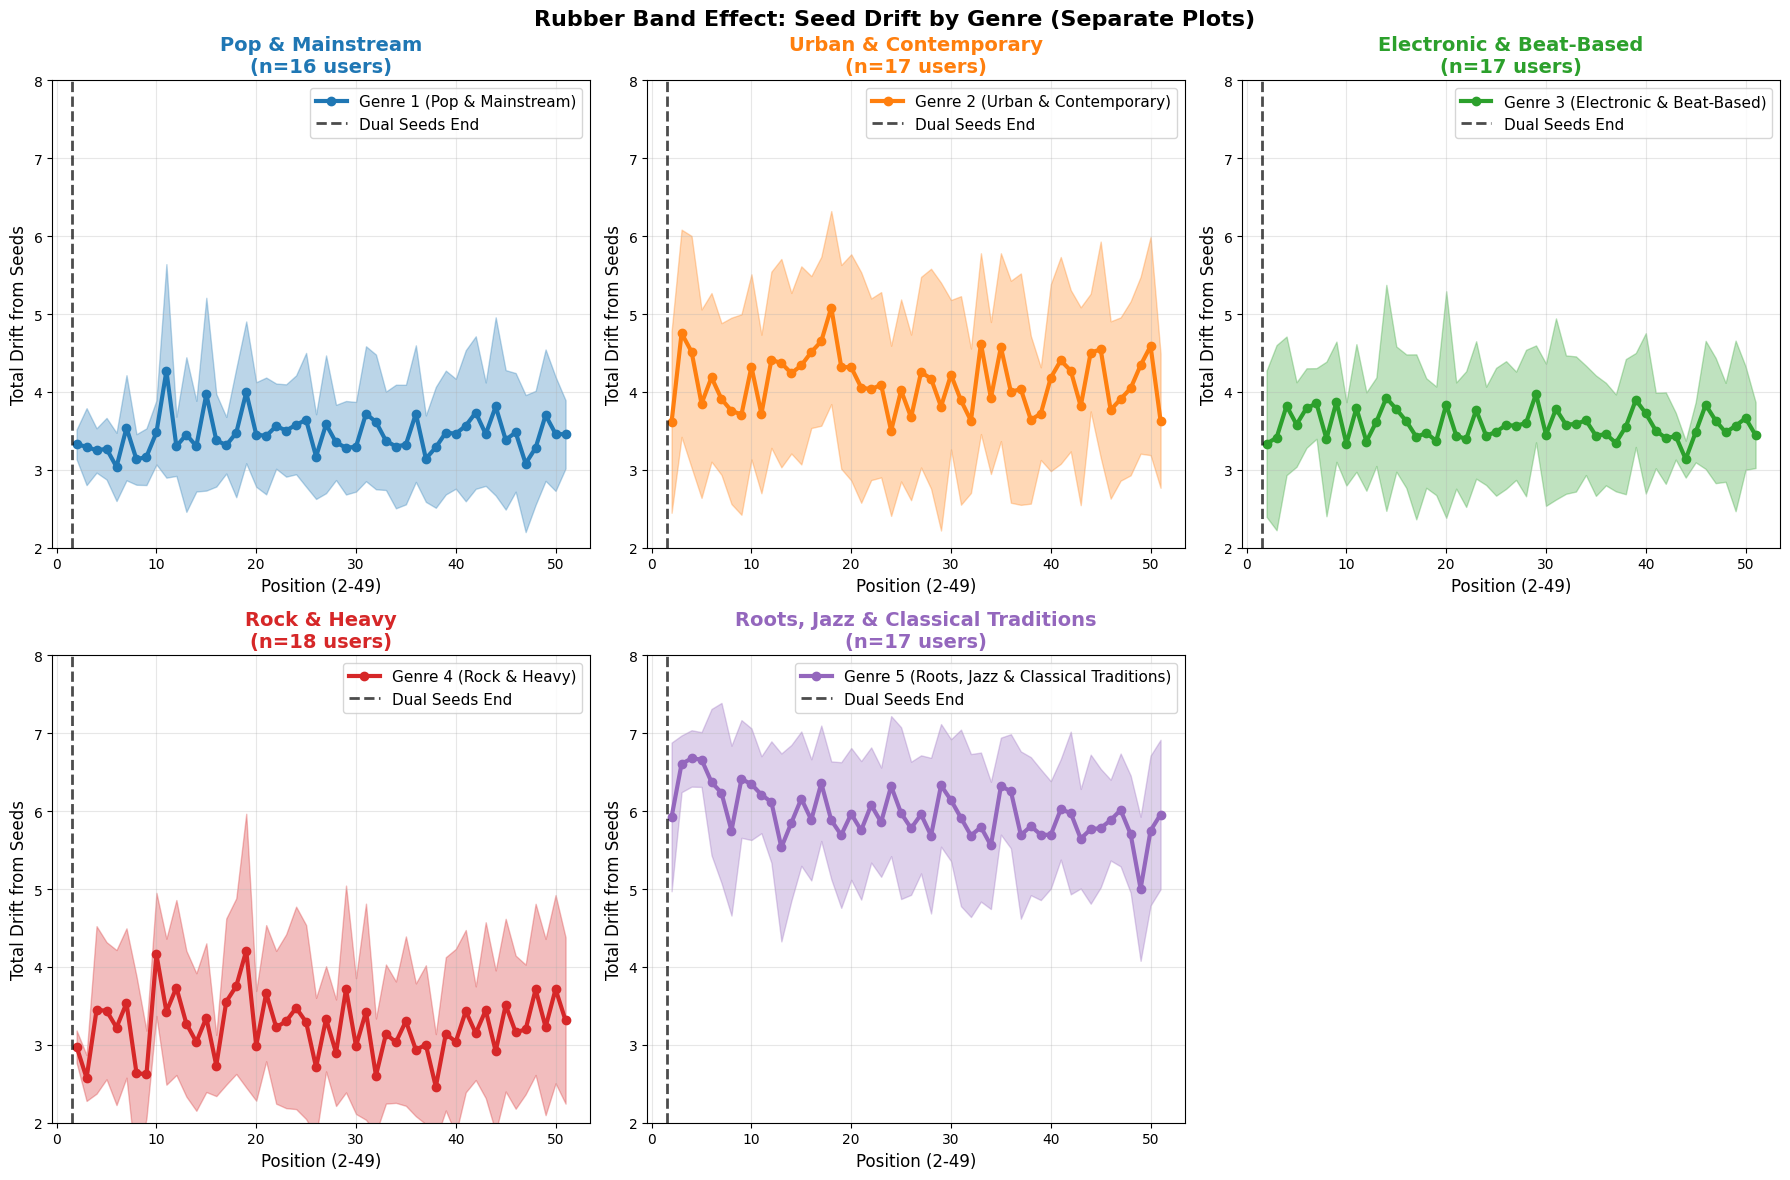

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# Get the same color palette as your original plot (tab10)
colors = sns.color_palette('tab10', n_colors=5)

# Genre order for consistent coloring
genres = sorted(all_user_drifts['user_seed_genre'].unique())  # [1,2,3,4,5]
genre_colors = {genre: colors[i] for i, genre in enumerate(genres)}

# Create separate subplot for each genre
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, genre in enumerate(genres):
    ax = axes[idx]
    
    # Filter data for this genre
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    # Plot mean line + shaded std region
    ax.plot(genre_data['position'], genre_data['mean'], 
            marker='o', linewidth=3, color=genre_colors[genre],
            label=f"Genre {int(genre)} ({genre_mapping[int(genre)]})")
    
    # Shaded confidence band (mean ± std)
    ax.fill_between(genre_data['position'], 
                   genre_data['mean'] - genre_data['std'], 
                   genre_data['mean'] + genre_data['std'], 
                   color=genre_colors[genre], alpha=0.3)
    
    # Formatting
    ax.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
    ax.set_xlabel('Position (2-49)', fontsize=12)
    ax.set_ylabel('Total Drift from Seeds', fontsize=12)
    ax.set_ylim(2, 8)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)
    
    ax.set_title(f'{genre_mapping[int(genre)]}\n(n={genre_data["count"].mean():.0f} users)', 
                 fontsize=14, fontweight='bold', color=genre_colors[genre])

# Hide empty subplot (if odd number of genres)
if len(genres) < 6:
    axes[-1].set_visible(False)

plt.suptitle('Rubber Band Effect: Seed Drift by Genre (Separate Plots)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


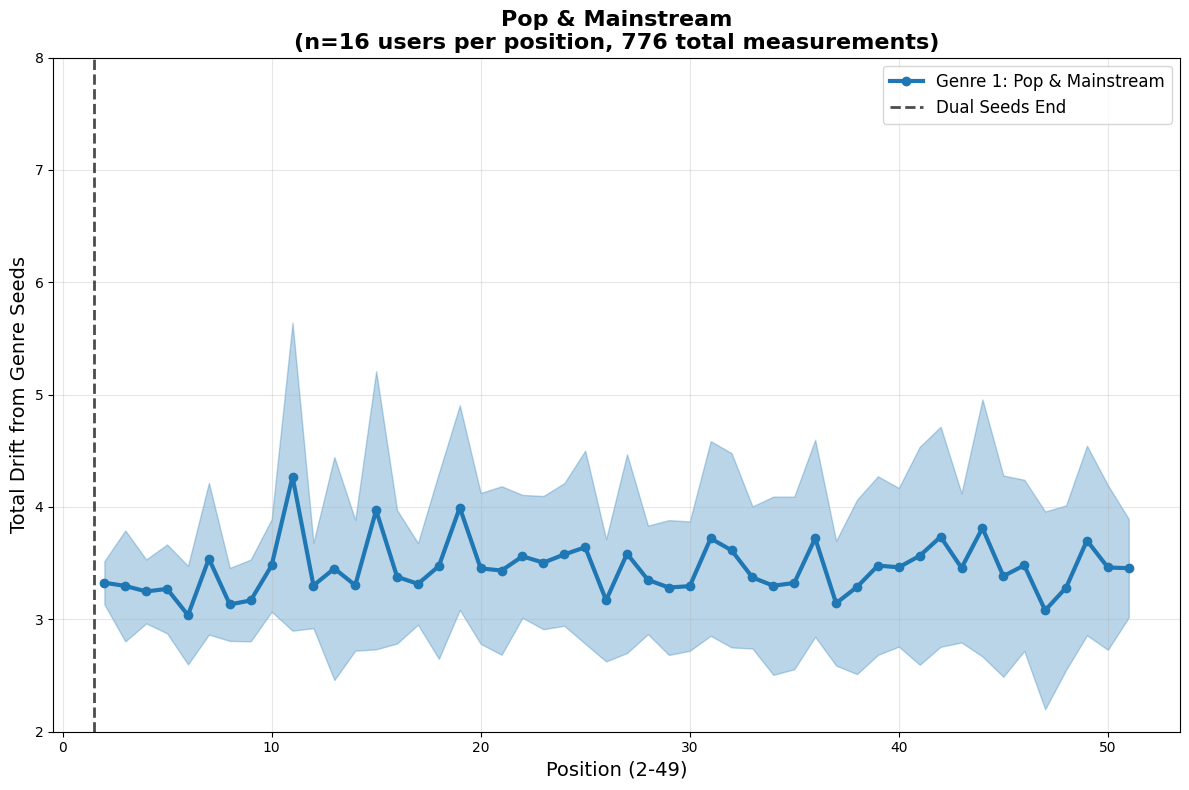

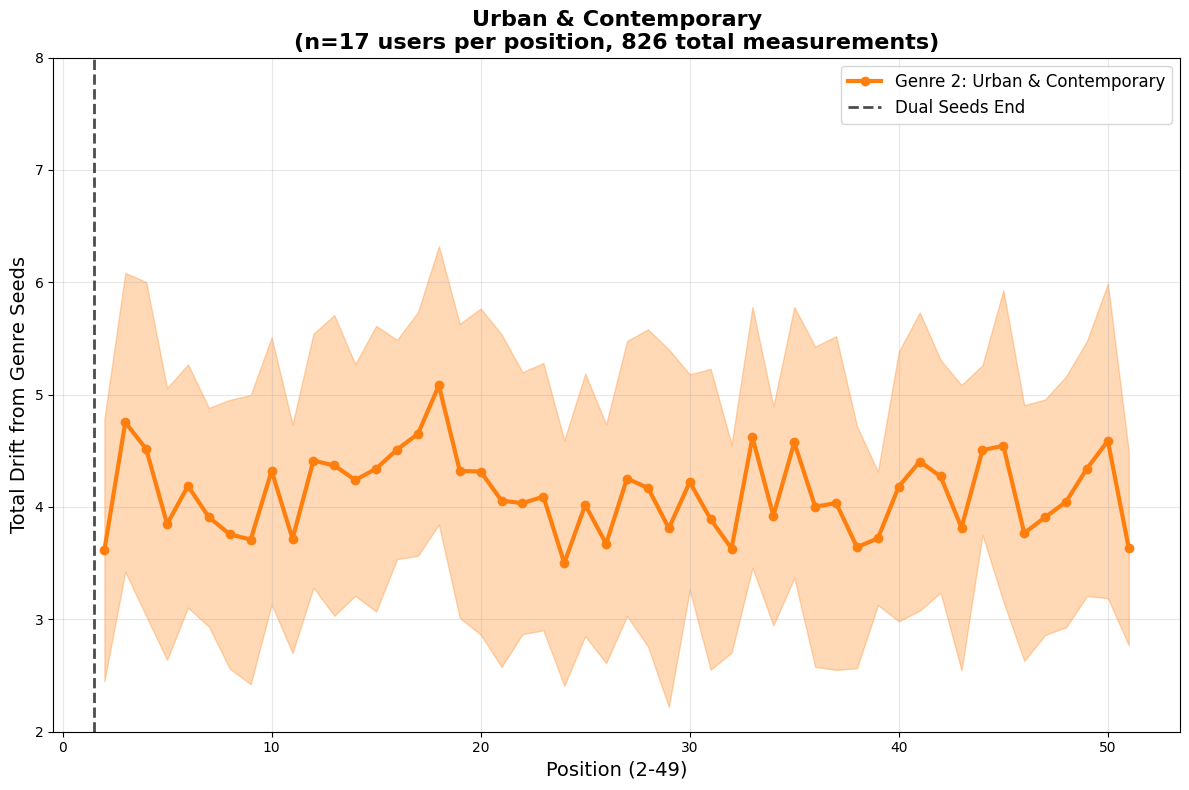

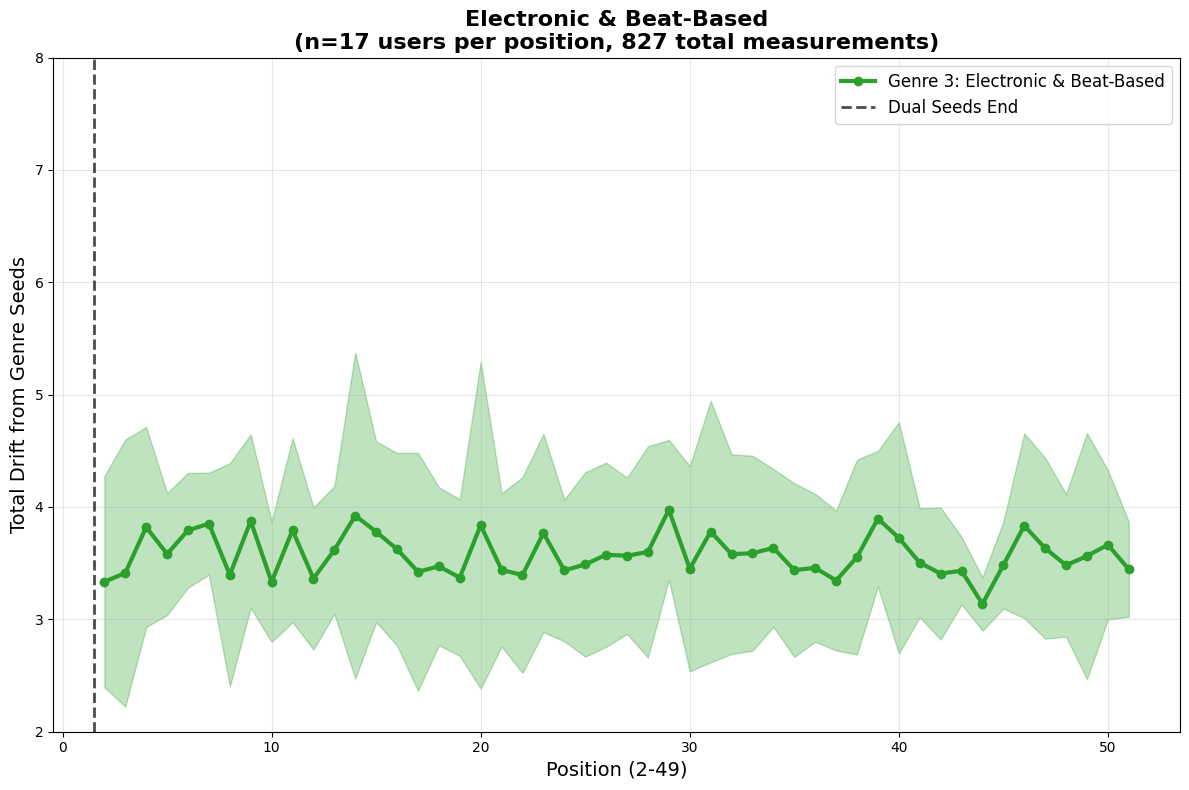

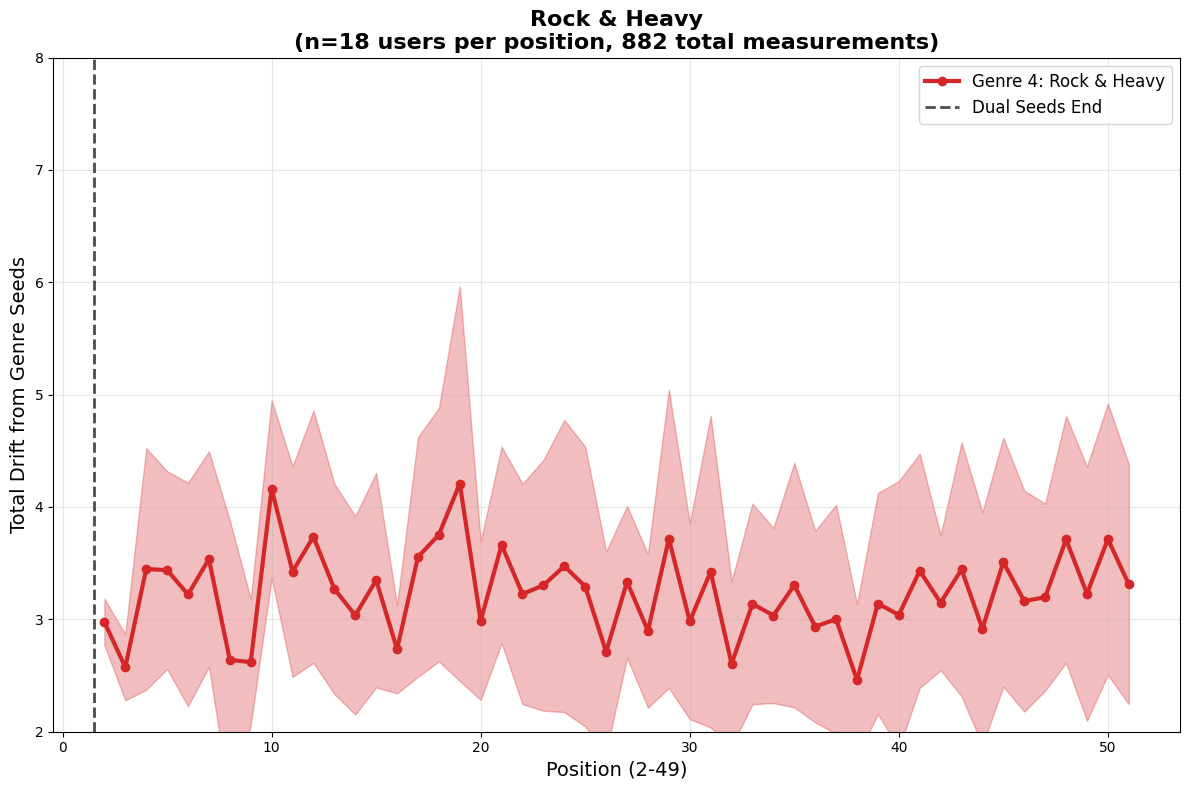

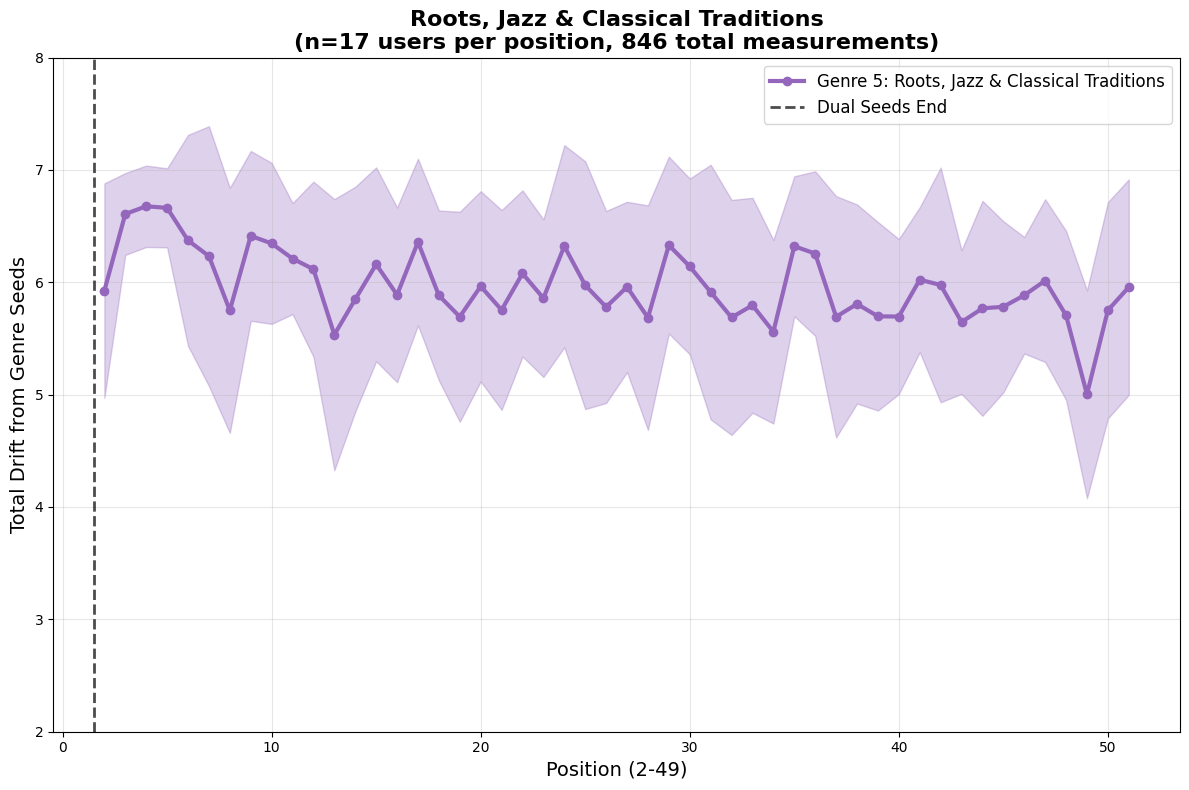

In [121]:
import matplotlib.pyplot as plt

# Same colors as original plot (tab10 palette)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Genre 1-5
genres = sorted(all_user_drifts['user_seed_genre'].unique())

# Create SEPARATE figure for EACH genre
for i, genre in enumerate(genres):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.figure(figsize=(12, 8))
    
    # Plot mean line + shaded std region
    plt.plot(genre_data['position'], genre_data['mean'], 
             marker='o', linewidth=3, color=colors[i],
             label=f"Genre {int(genre)}: {genre_mapping[int(genre)]}")
    
    # Shaded std region (mean ± 1 std)
    plt.fill_between(genre_data['position'], 
                    genre_data['mean'] - genre_data['std'], 
                    genre_data['mean'] + genre_data['std'], 
                    color=colors[i], alpha=0.3)
    
    # Formatting (same as original)
    plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
    plt.xlabel('Position (2-49)', fontsize=14)
    plt.ylabel('Total Drift from Genre Seeds', fontsize=14)
    plt.title(f'{genre_mapping[int(genre)]}\n'
              f'(n={genre_data["count"].mean():.0f} users per position, {genre_data["count"].sum()} total measurements)', 
              fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.ylim(2, 8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


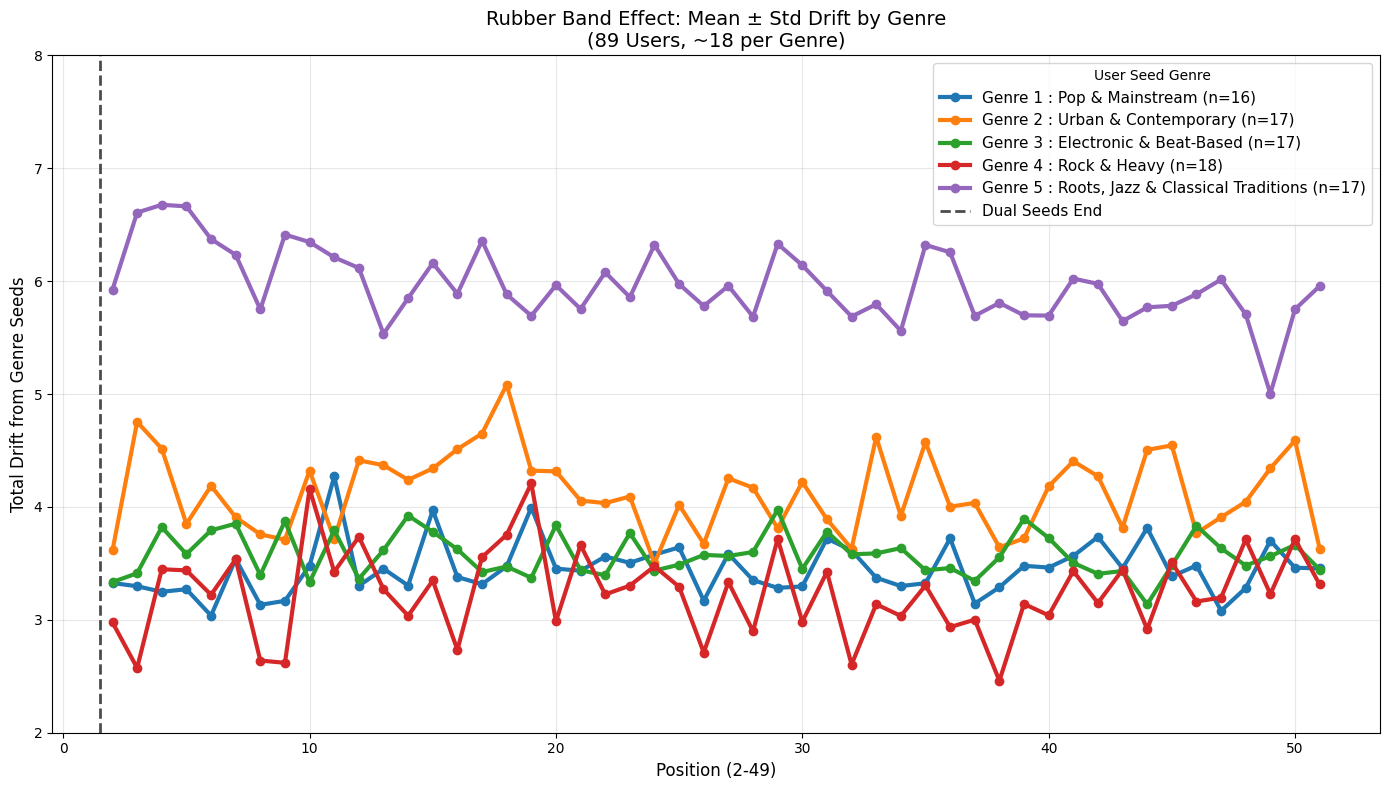

In [122]:
# Plot 2 : Witout Std Bands
plt.figure(figsize=(14, 8))
for genre in sorted(all_user_drifts['user_seed_genre'].unique()):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.plot(
    genre_data['position'],
    genre_data['mean'],
    marker='o',
    linewidth=3,
    label=(
        f"Genre {int(genre)} : "
        f"{genre_mapping[int(genre)]} "
        f"(n={genre_data['count'].mean():.0f})"
    )
)

plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
plt.xlabel('Position (2-49)', fontsize=12)
plt.ylabel('Total Drift from Genre Seeds', fontsize=12)
plt.title('Rubber Band Effect: Mean ± Std Drift by Genre\n(89 Users, ~18 per Genre)', fontsize=14)
plt.legend(title='User Seed Genre', fontsize=11)
plt.ylim(2, 8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 1. Statistical Significance Testing

Genre 1 p-value: 0.000
Genre 2 p-value: 0.000
Genre 3 p-value: 0.000
Genre 4 p-value: 0.000
Genre 5 p-value: 0.038


In [ ]:
# Per-genre feature drift contribution
feature_drifts = {}
for genre in [1,2,3,4,5]:
    seed_profile = dual_seeds[dual_seeds['first_genre']==genre][continuous_features].mean()
    for pos in range(2,51):  # Post-seed positions
        track_means = data[(data['first_genre']==genre) & 
                                     (data['position']==pos)][continuous_features].mean()
        feature_drifts[f'G{int(genre)}_P{pos}'] = (track_means - seed_profile).abs()


feature_drifts

dict